In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PATH = "thor-magni-actions/data/processed/thor_magni/"

In [3]:
dfs = []
for scenario_id in os.listdir(PATH):
    df = pd.read_csv(os.path.join(PATH, scenario_id), index_col="Time")
    dfs.append(df)
dfs = pd.concat(dfs)

In [4]:
from scipy.spatial.distance import euclidean


def compute_path_effciency(trakclet):
    trakclet["cumsum_delta"] = trakclet["2D_norm_delta"].cumsum()
    first_location = (
        trakclet["x"].iloc[0],
        trakclet["y"].iloc[0],
    )
    trakclet["dist_origin_loc_i"] = trakclet.apply(
        lambda row: euclidean(first_location, (row["x"], row["y"])), axis=1
    )
    trakclet["path_efficiency"] = (
        trakclet["dist_origin_loc_i"] / trakclet["cumsum_delta"]
    )
    return trakclet

In [5]:
tracklets_grouped = df.groupby(
    ["file_name", "ag_id", "tracklet_id"], group_keys=False
).apply(compute_path_effciency)

In [6]:
tracklets_grouped = dfs.groupby(["file_name", "ag_id", "tracklet_id"])
tracklets_grouped.ngroups

2537

In [ ]:
print("Agent types:", dfs["agent_type"].unique())
print("Actions:", dfs["action"].unique())

Agent types: ['Visitors-Alone HRI' 'Visitors-Group' 'Carrier-Large Object'
 'Carrier-Bucket' 'Carrier-Box' 'Visitors-Alone' 'Carrier-Storage Bin HRI']
Activities: ['DrawCard' 'Walk' 'HRI' 'ObserveCardDraw' 'WalkLO' 'PickBucket'
 'WalkBucket' 'DeliverBucket' 'PickBox' 'WalkBox' 'DeliverBox'
 'PickStorageBin' 'WalkStorageBin' 'DeliverStorageBin']


In [ ]:
actions_mapping = (
    dfs.groupby("agent_type")["action"]
    .apply(lambda x: list(set(x)))
    .to_dict()
)
actions_mapping

{'Carrier-Box': ['WalkBox', 'DeliverBox', 'PickBox', 'Walk'],
 'Carrier-Bucket': ['Walk', 'PickBucket', 'WalkBucket', 'DeliverBucket'],
 'Carrier-Large Object': ['DrawCard', 'ObserveCardDraw', 'WalkLO', 'Walk'],
 'Carrier-Storage Bin HRI': ['PickStorageBin',
  'DeliverStorageBin',
  'DrawCard',
  'WalkStorageBin',
  'HRI',
  'Walk'],
 'Visitors-Alone': ['DrawCard', 'Walk'],
 'Visitors-Alone HRI': ['DrawCard', 'HRI', 'Walk'],
 'Visitors-Group': ['DrawCard', 'ObserveCardDraw', 'Walk']}

In [9]:
action_agent_counts = pd.crosstab(dfs['action'], dfs['agent_type'])

In [10]:
action_agent_counts["total"] = action_agent_counts.sum(axis=1)
action_agent_counts = action_agent_counts.sort_values(
    "total", ascending=False
).drop(columns="total")

In [ ]:
action_agent_counts.index[2]

'ObserveCardDraw'

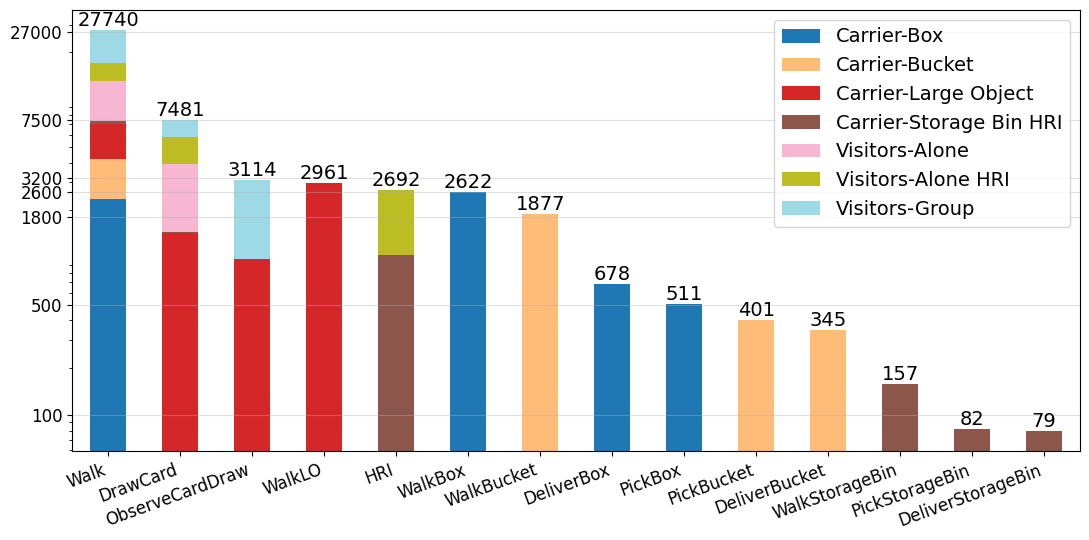

In [12]:
num_agent_types = len(action_agent_counts.columns)
colormap = plt.cm.get_cmap(
    "tab20", num_agent_types
)  # You can use different colormaps like 'viridis', 'tab20', etc.
colors = [colormap(i) for i in range(num_agent_types)]
ax = action_agent_counts.plot(
    kind="bar", stacked=True, color=colors, figsize=(11, 5.5)
)

for i, bar in enumerate(ax.patches[: len(action_agent_counts)]):
    # Get the total value for each action
    action_name = action_agent_counts.index[
        i 
    ]  # Correct index for each action
    # print(action_name)
    total = action_agent_counts.loc[action_name].sum()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        total,
        str(int(total)),
        ha="center",
        va="bottom",
        fontsize=14,
    )


plt.xticks(rotation=20, ha="right")
plt.yscale("log")
ax.set_yticks([100, 500, 1800, 2600, 3200, 7500, 27000], fontsize=20)  # Adjust based on your data range
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}'.format(y)))
ax.tick_params(axis='both', labelsize=12)  # X tick label font size
ax.grid(axis="y", alpha=0.4)

# Add labels and title
plt.xlabel("")
# plt.ylabel("Log Count")
# plt.title("Action Counts with Agent Type Proportions (Log Scale)")

# Move the legend to the best position
plt.legend(loc="best", fontsize=14)

# Adjust layout
plt.tight_layout()
# plt.savefig("/home/tmr/Downloads/action_dist.svg")

# Stats

Velocity, acceleration, and distance

global vs action

In [13]:
dfs

,frame_id,x,y,z,ag_id,agent_type,x_delta,y_delta,x_speed,y_speed,...,y_acc,2D_acc,z_acc,3D_acc,heading,file_name,qtm_frame_act,activity,dataset_name,tracklet_id
Time,,,,,,,,,,,,,,,,,,,,,
0.01,1,0.765882,3.133981,1.888912,Helmet_10,Visitors-Alone HRI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,THOR-Magni_300922_SC4A_R1.csv,1,DrawCard,Scenario_4,1
0.41,41,0.727811,3.180632,1.877905,Helmet_10,Visitors-Alone HRI,-0.038071,0.046651,-0.095179,0.116627,...,NaN,NaN,NaN,NaN,2.255273,THOR-Magni_300922_SC4A_R1.csv,41,DrawCard,Scenario_4,1
0.81,81,0.543434,3.285499,1.847379,Helmet_10,Visitors-Alone HRI,-0.184376,0.104867,-0.460941,0.262169,...,0.363853,0.949367,-0.121991,0.956788,2.624454,THOR-Magni_300922_SC4A_R1.csv,81,DrawCard,Scenario_4,1
1.21,121,0.256941,3.334037,1.782013,Helmet_10,Visitors-Alone HRI,-0.286493,0.048537,-0.716233,0.121343,...,-0.352066,0.490391,-0.217756,0.522118,2.973768,THOR-Magni_300922_SC4A_R1.csv,121,DrawCard,Scenario_4,1
1.61,161,0.089758,3.352358,1.706474,Helmet_10,Visitors-Alone HRI,-0.167183,0.018321,-0.417956,0.045802,...,-0.188850,-0.764950,-0.063575,-0.709178,3.032441,THOR-Magni_300922_SC4A_R1.csv,161,DrawCard,Scenario_4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225.61,22561,-4.881211,-1.416687,1.892578,Helmet_5,Carrier-Large Object,-0.468640,0.167583,-1.171599,0.418958,...,-0.150783,0.061694,0.166334,0.060418,2.798168,THOR-Magni_180522_SC3B_R2.csv,22561,WalkLO,Scenario_3,815
226.01,22601,-5.318670,-1.177863,1.904079,Helmet_5,Carrier-Large Object,-0.437458,0.238824,-1.093645,0.597060,...,0.445255,0.004387,0.011907,0.004638,2.641875,THOR-Magni_180522_SC3B_R2.csv,22601,WalkLO,Scenario_3,815
226.41,22641,-5.768345,-0.910268,1.886437,Helmet_5,Carrier-Large Object,-0.449676,0.267595,-1.124190,0.668986,...,0.179816,0.155436,-0.182138,0.156465,2.604797,THOR-Magni_180522_SC3B_R2.csv,22641,WalkLO,Scenario_3,815


In [14]:
tracklets_grouped = dfs.groupby(["file_name", "ag_id", "tracklet_id"])
tracklets_grouped.ngroups

2537

In [15]:
global_stats = {
    "speed": [],
    "acceleration": [],
    "distance": [],
    "n_tracklets": 0,
}

specific_stats = {
    "agent_types": {
        at: {
            "speed": [],
            "acceleration": [],
            "distance": [],
            "path_efficiency": [],
            "n_tracklets": 0,
        }
        for at in dfs["agent_type"].unique()
    },
    "actions": {
        act: {"speed": [], "acceleration": [], "distance": [], "n_tracklets": 0}
        for act in dfs["action"].unique()
    },
}

for gn, participant_tracklet in tracklets_grouped:
    tracklets_ids = participant_tracklet["tracklet_id"].unique()
    for tracklet_id in tracklets_ids:
        tracklet_info = participant_tracklet[
            participant_tracklet["tracklet_id"] == tracklet_id
        ]
        global_stats["speed"].extend(tracklet_info["2D_speed"].values[1:])
        global_stats["acceleration"].extend(tracklet_info["2D_acc"].values[2:])
        global_stats["distance"].append(tracklet_info["2D_norm_delta"].sum())
        global_stats["n_tracklets"] += 1

        agent_type = tracklet_info["agent_type"].iloc[0]
        specific_stats["agent_types"][agent_type]["speed"].extend(
            tracklet_info["2D_speed"].values[1:]
        )
        specific_stats["agent_types"][agent_type]["acceleration"].extend(
            tracklet_info["2D_acc"].values[2:]
        )
        specific_stats["agent_types"][agent_type]["distance"].append(
            tracklet_info["2D_norm_delta"].sum()
        )
        specific_stats["agent_types"][agent_type]["n_tracklets"] += 1

        for curr_act in tracklet_info["action"].unique():
            target_info = tracklet_info[tracklet_info["action"] == curr_act]
            specific_stats["actions"][curr_act]["speed"].extend(
                target_info["2D_speed"].dropna()
            )
            specific_stats["actions"][curr_act]["acceleration"].extend(
                target_info["2D_acc"].dropna()
            )
            specific_stats["actions"][curr_act]["distance"].append(
                target_info["2D_norm_delta"].sum()
            )
            specific_stats["actions"][curr_act]["n_tracklets"] += 1

In [16]:
gl_speed = np.array(global_stats["speed"])
gl_acc = np.array(global_stats["acceleration"])
gl_dist = np.array(global_stats["distance"])
avg_global_speed, std_global_speed = gl_speed.mean(), gl_speed.std()
avg_global_acc, std_global_acc = gl_acc.mean(), gl_acc.std()
avg_global_dist, std_global_dist = gl_dist.mean(), gl_dist.std()

print("Global stats:")
print(f"Number of tracklets:{global_stats['n_tracklets']}")
print(f"Velocity:{avg_global_speed:1.2f}+-{std_global_speed:1.2f}")
print(f"Acceleration:{avg_global_acc:1.2f}+-{std_global_acc:1.2f}")
print(f"Distance:{avg_global_dist:1.2f}+-{std_global_dist:1.2f}")

Global stats:
Number of tracklets:2537
Velocity:0.85+-0.48
Acceleration:0.02+-0.38
Distance:6.72+-2.73


In [17]:
action_stats = specific_stats["actions"]
print("Stats per action:")

for action, act_stats in action_stats.items():
    act_speed = np.array(act_stats["speed"])
    act_acc = np.array(act_stats["acceleration"])
    act_dist = np.array(act_stats["distance"])
    avg_act_speed, std_act_speed = act_speed.mean(), act_speed.std()
    avg_act_acc, std_act_acc = act_acc.mean(), act_acc.std()
    avg_act_dist, std_act_dist = act_dist.mean(), act_dist.std()
    print(action)
    print(f"Number of tracklets:{act_stats['n_tracklets']}")
    print(f"Velocity:{avg_act_speed:1.2f}+-{std_act_speed:1.2f}")
    print(f"Acceleration:{avg_act_acc:1.2f}+-{std_act_acc:1.2f}")
    print(f"Distance:{avg_act_dist:1.2f}+-{std_act_dist:1.2f}")
    print()

Stats per activity:
DrawCard
Number of tracklets:930
Velocity:0.36+-0.38
Acceleration:-0.09+-0.49
Distance:1.14+-0.89

Walk
Number of tracklets:1990
Velocity:1.03+-0.39
Acceleration:0.07+-0.33
Distance:5.75+-2.97

HRI
Number of tracklets:157
Velocity:0.32+-0.24
Acceleration:0.00+-0.35
Distance:2.20+-1.22

ObserveCardDraw
Number of tracklets:398
Velocity:0.33+-0.31
Acceleration:-0.09+-0.35
Distance:1.02+-0.80

WalkLO
Number of tracklets:207
Velocity:0.83+-0.35
Acceleration:0.01+-0.32
Distance:4.75+-2.71

PickBucket
Number of tracklets:73
Velocity:0.74+-0.46
Acceleration:-0.23+-0.77
Distance:1.61+-0.85

WalkBucket
Number of tracklets:147
Velocity:1.26+-0.27
Acceleration:0.06+-0.31
Distance:6.41+-3.58

DeliverBucket
Number of tracklets:68
Velocity:0.78+-0.50
Acceleration:-0.22+-0.82
Distance:1.59+-0.81

PickBox
Number of tracklets:88
Velocity:0.61+-0.41
Acceleration:-0.14+-0.58
Distance:1.41+-0.96

WalkBox
Number of tracklets:185
Velocity:1.20+-0.30
Acceleration:0.08+-0.31
Distance:6.78+-

In [18]:
global_metrics = dfs[['2D_speed', '2D_acc']].mean()
global_std = dfs[['2D_speed', '2D_acc']].std()

In [19]:
action_metrics = dfs.groupby('action')[['2D_speed', '2D_acc']].agg(['mean', 'std'])

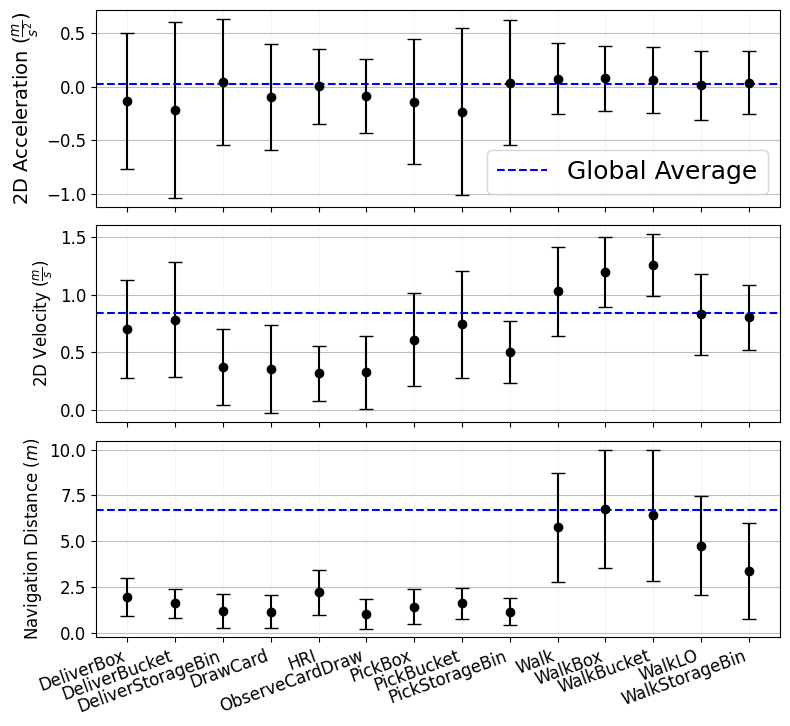

In [34]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8), sharex=True)

axs[0].errorbar(
    action_metrics.index,
    action_metrics["2D_acc"]["mean"],
    yerr=action_metrics["2D_acc"]["std"],
    fmt="o",
    capsize=5,
    color="black",
);
axs[0].axhline(
    global_metrics["2D_acc"],
    color="blue",
    linestyle="--",
    label="Global Average",
)
axs[0].set_ylabel(r"2D Acceleration ($\frac{m}{s^2}$)", fontsize=14)
axs[0].legend(fontsize=18);

axs[1].errorbar(
    action_metrics.index,
    action_metrics["2D_speed"]["mean"],
    yerr=action_metrics["2D_speed"]["std"],
    fmt="o",
    capsize=5,
    color="black",
);
axs[1].axhline(
    global_metrics["2D_speed"],
    color="blue",
    linestyle="--",
    label="Global Average",
)
axs[1].set_ylabel(r"2D Velocity ($\frac{m}{s}$)", fontsize=12)


axs[2].errorbar(
    action_metrics.index,
    [np.array(action_stats[idx]["distance"]).mean() for idx in action_metrics.index],
    yerr=[np.array(action_stats[idx]["distance"]).std() for idx in action_metrics.index],
    fmt="o",
    capsize=5,
    color="black",
);
axs[2].axhline(
    avg_global_dist,
    color="blue",
    linestyle="--",
    label="Global",
)
axs[2].set_ylabel(r"Navigation Distance ($m$)", fontsize=12)
axs[0].tick_params(axis='both', labelsize=12)  # X tick label font size
axs[1].tick_params(axis='both', labelsize=12)  # X tick label font size
axs[2].tick_params(axis='both', labelsize=12)  # X tick label font size
axs[0].grid(axis="x", alpha=0.1);
axs[1].grid(axis="x", alpha=0.1);
axs[2].grid(axis="x", alpha=0.1);
axs[0].grid(axis="y", alpha=0.8);
axs[1].grid(axis="y", alpha=0.8);
axs[2].grid(axis="y", alpha=0.8);

plt.xticks(rotation=20, ha="right");
plt.tight_layout(rect=[0, 0.03, 1, 0.95], h_pad=1.0)
# plt.savefig("/home/tmr/Downloads/stats.svg")